In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [104]:
df=pd.read_csv('Salary_dataset.csv',sep=',',header=None)
df.columns = ['', 'YearsExperience','Salary']
df.head(5)

,,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


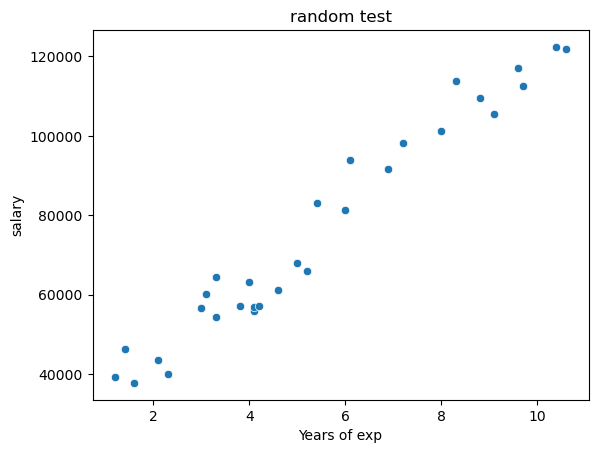

In [105]:
ax=sns.scatterplot(x='YearsExperience',y='Salary',data=df)
ax.set(xlabel='Years of exp',ylabel='salary',title='random test')
plt.show()

In [71]:

'''df.dropna(subset=['YearsExperience', 'Salary'], inplace=True)

df['YearsExperience'] = pd.to_numeric(df['YearsExperience'], errors='coerce')  # Convert to numeric, set non-numeric values to NaN
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df['YearsExperience']=(df['YearsExperience']-df['YearsExperience'].mean())/df['YearsExperience'].std()   # standardization
df['Salary']=(df['Salary']-df['Salary'].mean())/df['Salary'].std()'''

In [106]:
df['YearsExperience']

0      1.2
1      1.4
2      1.6
3      2.1
4      2.3
5      3.0
6      3.1
7      3.3
8      3.3
9      3.8
10     4.0
11     4.1
12     4.1
13     4.2
14     4.6
15     5.0
16     5.2
17     5.4
18     6.0
19     6.1
20     6.9
21     7.2
22     8.0
23     8.3
24     8.8
25     9.1
26     9.6
27     9.7
28    10.4
29    10.6
Name: YearsExperience, dtype: float64

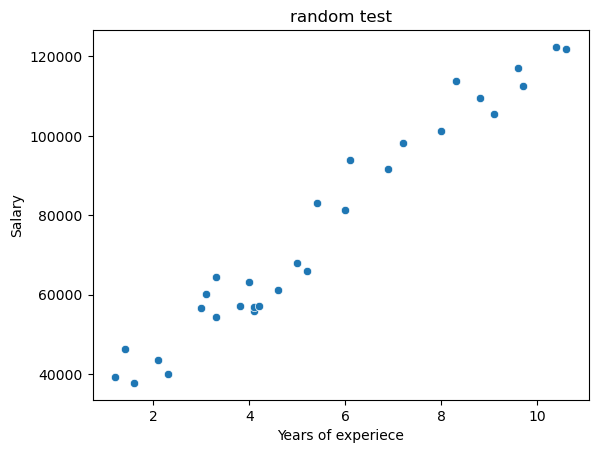

In [107]:
ax=sns.scatterplot(x='YearsExperience',y='Salary',data=df)
ax.set(xlabel='Years of experiece',ylabel='Salary',title='random test')
plt.show()

In [108]:
N=df.shape[0]
X=np.vstack((np.ones((1,N)),df.YearsExperience.values.reshape(1,-1)))
y=np.array(df.Salary.values).reshape(-1,1)
theta=np.zeros(shape=(X.shape[0],1))

iterations=1000
alpha=0.01


In [109]:
def cost_fun(X,y,theta):
    N=y.shape[0]
    h=X.T.dot(theta)
    J = (1/(2*N)) * (np.sum((h-y)**2))
    return J

In [110]:
def gradient_descent(X,y,theta,alpha,num_iters):
    N=y.shape[0]
    J_history=np.zeros(shape=(num_iters, 1))

    for i in range(0,num_iters):
        h=X.T.dot(theta)
        diff_hy=h-y

        delta=(1/N) * (X.dot(diff_hy))
        theta=theta-(alpha*delta)
        J_history[i]=cost_fun(X,y, theta)
    return theta,J_history

In [111]:
theta,J_hist = gradient_descent(X,y,theta,alpha,iterations)
print('Theta found by gradient descent:\n',theta)

print('Final cost value:', J_hist[-1])

Theta found by gradient descent:
 [[21912.58918422]
 [ 9880.81400461]]
Final cost value: [16540035.37692821]


In [112]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(df.YearsExperience.values.reshape(-1,1),df.Salary.values.reshape(-1,1))

LinearRegression()

In [113]:
reg.intercept_,reg.coef_

(array([24848.20396652]), array([[9449.96232146]]))

[Text(0.5, 0, 'Years of exp'),
 Text(0, 0.5, 'Salary'),
 Text(0.5, 1.0, 'random test')]

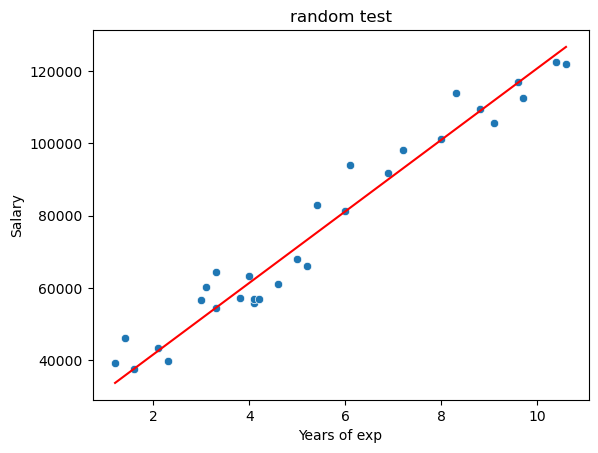

In [116]:
ax=sns.scatterplot(x='YearsExperience',y='Salary',data=df)
plt.plot(X[1,:], X.T.dot(theta),color="r")
ax.set(xlabel='Years of exp',ylabel='Salary',title='random test')